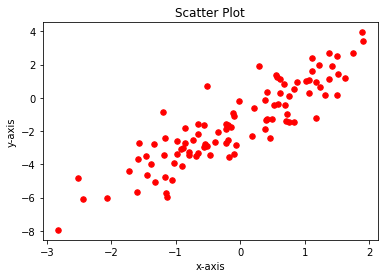

In [11]:
# note: the description in 3.7 is more detailed

# note: if you use this in Jupyter, please split the code to multiple cells.

"""
Step 0

Write Python code that creates a scatter plot of random data
that roughly follows the trend line:

y = −1.5 + 2.0 x

Try using the np.random.normal function to create randomly distributed x values. 
Then calculate ytrue using a bias/intercept of -1.5 and a slope/weight of 2.0. 
Add some random noise with the np.random.normal function.
"""

from matplotlib import pyplot as plt
import numpy as np

x = np.random.normal(size= 100)
ytrue = -1.5 + 2.0 * x + np.random.normal(size= 100)
plt.scatter(x, ytrue, color='r', s=30)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Scatter Plot')
plt.show()






In [18]:
import pandas as pd
df = pd.DataFrame({'x' : x, 'ytrue': ytrue})
df

,x,ytrue
0,0.411045,-1.270003
1,-0.796648,-3.407757
2,0.416495,0.365649
3,-1.201260,-0.833075
4,0.392652,-1.337349
...,...,...
95,-1.601364,-5.686156
96,-1.153599,-5.700215
97,-2.068148,-6.022584
98,-1.027219,-3.926430


In [ ]:
"""
Step 1

write a python function called make_line that (our model)
"""
"""
    a linear model with 3 arguments :

    x : data (list)
    w1 : slope (float)
    w0 (float)
    
    and returns a list of “predicted” y values based on those parameters.
"""

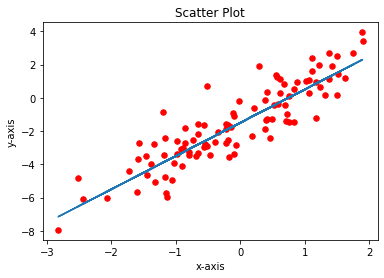

In [29]:
def make_line(x, w0, w1):

    ypred = w0 + x * w1 # calculate the predicted values
    return ypred

# check if your function works with random parameters:

plt.plot(x, make_line(x, -1.5, 2.0))
plt.scatter(x, ytrue, color='r', s=30)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Scatter Plot')
plt.show()

In [ ]:
"""
Step 2

Write a python function called mse() that calculates the MSE (our loss)
"""

  """
    accepts ytrue and ypred as arguments (both lists)
    
    returns a single value for the mean-squared-error.
    """

In [35]:
def mse(ytrue, ypred):
  
    error = np.mean((ytrue - ypred)**2)
    return error


#test the function with

a = np.array([1.0, 1.2, 1.4, 1.6])
b = np.array([0.2, 0.4, 0.6, 0.8])

assert round(mse(a,b), 2) == 0.64

In [39]:
"""
Step 3

Write a python function called calc_gradient that takes care of the partial derivatives
"""

def calc_gradient(x, ytrue, w0, w1):
    """
    calculates the numeric partial derivative for each parameter 
    based on a small incremental change dω, and then returns the 2 partial derivatives.

    arguments:
    
    the x data
    ytrue
    a slope w1
    an intercept w0

    returns two values for the partial derivatives of w0 and w1 (called the gradient)

    NOTE: We are not calculating the derivative by differentiating the MSE function.
    Instead, we approximate it by calculating two values close to each other.
    """
    dw = 0.0001
    ypred = w0 + x * w1

    '''tweak first parameter'''
    w1_change = w1 + dw
    # calculate predictions using w0 and w1_change
    ypred_w1 = w0 + x * w1_change
    # one mse for (w0, w1) and one for (w0, w1 + dw)
    deriv_w1 = (mse(ytrue, ypred_w1)- mse(ytrue, ypred)) / dw

    '''tweak second parameter'''
    w0_change = w0 + dw
    # calculate predictions using w0_change and w1
    ypred_w0 = w0_change + x * w1
    deriv_w0 = (mse(ytrue, ypred_w0)- mse(ytrue, ypred)) / dw

    return deriv_w0, deriv_w1 # return both derivations as a list

In [43]:
"""
Step 4 

Implement gradient descent

Repeat the following steps `MAX_ITER` times.
In each iteration of the loop:

1. Calculate the gradient of the loss function with respect to each model parameter.
2. If the gradient becomes really close to zero, break out of the loop.
3. For each model parameter,
   - calculate the updated parameter value using the formula from the chapter.
   - overwrite the value with its updated value.
4. Print all variables to check if they are converging to their expected values.

"""

w0 = -1.0 # arbitrary starting value
w1 = 5.0 # arbitrary starting value
LR = 0.01 # choose a small learning rate
MAX_ITER = 500


def train(x, ytrue, LR, MAX_ITER, w0, w1):
    for i in range(MAX_ITER):
        deriv_w0, deriv_w1 = calc_gradient(x, ytrue, w0, w1)
        w0 = w0 - (LR * deriv_w0)
        w1 = w1 - (LR * deriv_w1)
        print(f"{w0:12.8f}      {w1:12.8f}")
    
        
        
        
train(x, ytrue, LR, MAX_ITER, w0, w1)


 -1.00282503        4.93178438
 -1.00570407        4.86512437
 -1.00863352        4.79998430
 -1.01160992        4.73632932
 -1.01462991        4.67412541
 -1.01769028        4.61333928
 -1.02078792        4.55393847
 -1.02391984        4.49589121
 -1.02708317        4.43916650
 -1.03027512        4.38373403
 -1.03349304        4.32956422
 -1.03673436        4.27662812
 -1.03999661        4.22489750
 -1.04327743        4.17434474
 -1.04657453        4.12494288
 -1.04988572        4.07666556
 -1.05320890        4.02948705
 -1.05654205        3.98338219
 -1.05988323        3.93832642
 -1.06323058        3.89429572
 -1.06658231        3.85126663
 -1.06993672        3.80921626
 -1.07329217        3.76812219
 -1.07664708        3.72796257
 -1.07999996        3.68871602
 -1.08334936        3.65036166
 -1.08669391        3.61287910
 -1.09003229        3.57624839
 -1.09336325        3.54045006
 -1.09668558        3.50546510
 -1.09999815        3.47127491
 -1.10329986        3.43786133
 -1.1065

 -1.38238693        1.99295890
 -1.38243584        1.99289895
 -1.38248386        1.99284029
 -1.38253102        1.99278289
 -1.38257733        1.99272673
 -1.38262281        1.99267178
 -1.38266746        1.99261802
 -1.38271131        1.99256541
 -1.38275437        1.99251393
 -1.38279665        1.99246356
 -1.38283816        1.99241427
 -1.38287893        1.99236604
 -1.38291896        1.99231886
 -1.38295826        1.99227268
 -1.38299685        1.99222750
 -1.38303474        1.99218329
 -1.38307195        1.99214002
 -1.38310848        1.99209769
 -1.38314436        1.99205627
 -1.38317958        1.99201573
 -1.38321416        1.99197607
 -1.38324811        1.99193725
 -1.38328145        1.99189927
 -1.38331418        1.99186211
 -1.38334632        1.99182574
 -1.38337788        1.99179015
 -1.38340886        1.99175532
 -1.38343928        1.99172124
 -1.38346914        1.99168789
 -1.38349846        1.99165526
 -1.38352725        1.99162332
 -1.38355552        1.99159207
 -1.3835

In [ ]:
"""
Step 5

Make the learning rate very small and/or very large. What happens?
"""

In [ ]:
train(x, ytrue, LR, MAX_ITER, w0, w1)

In [ ]:
...

"""
Step 6 (Bonus)

Plot the loss function over time.
"""

...